In [119]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn
from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.preprocessing import StandardScaler
import pydotplus
from IPython.display import Image


In [120]:
url= 'https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv'

titanic = pd.read_csv(url)

In [121]:
titanic.drop(['PassengerId','Name','Cabin', 'Embarked','Ticket'], axis=1,inplace=True)

In [122]:
titanic['Sex'] = titanic['Sex'].map({'male':1,'female':0})

In [123]:
titanic['Age'].fillna(value=titanic['Age'].mean(),inplace=True)

In [124]:
titanic.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64

In [125]:
titanic.dtypes

Survived      int64
Pclass        int64
Sex           int64
Age         float64
SibSp         int64
Parch         int64
Fare        float64
dtype: object

In [126]:
titanic['Age'] = titanic['Age'].astype(int)

In [127]:
titanic['Fare'] = titanic['Fare'].astype(int)

In [128]:
X = titanic.drop('Survived',axis=1)
y = titanic['Survived']
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.30, random_state= 35)

In [129]:
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [130]:
feature_name=list(X.columns)
class_name = list(y_train.unique())
feature_name

['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']

In [131]:
clf.score(x_train,y_train)

0.9598715890850722

In [132]:
clf.score(x_test,y_test)

0.8022388059701493

In [133]:
y_pred = clf.predict(x_test)

In [134]:
accuracy_score(y_test,y_pred)

0.8022388059701493

In [135]:
confusion_matrix (y_test,y_pred)

array([[133,  28],
       [ 25,  82]], dtype=int64)

In [136]:
scalar = StandardScaler()

x_transform = scalar.fit_transform(X)

In [137]:
grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,32,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'splitter' : ['best', 'random']
    
}

In [138]:
grid_search = GridSearchCV(estimator=clf,
                     param_grid=grid_param,
                     cv=5,
                    n_jobs =-1)

In [139]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                     

In [140]:
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 11,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'splitter': 'random'}

In [23]:
grid_search.best_score_

0.8122709677419355

In [141]:
clf = DecisionTreeClassifier(criterion = 'gini', max_depth = 11, min_samples_leaf = 3, min_samples_split = 8, splitter = 'random')
clf.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=11, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='random')

In [142]:
clf.score(x_test,y_test)

0.832089552238806

In [143]:
y_pred = clf.predict(x_test)
accuracy_score(y_test,y_pred)

0.832089552238806

In [144]:
confusion_matrix (y_test,y_pred)

array([[133,  28],
       [ 17,  90]], dtype=int64)

In [26]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22,1,0,7
1,1,1,0,38,1,0,71
2,1,3,0,26,0,0,7
3,1,1,0,35,1,0,53
4,0,3,1,35,0,0,8


<IPython.core.display.Javascript object>

C:\Users\Administrator\AppData\Roaming\Python\Python38\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare', ylabel='Density'>

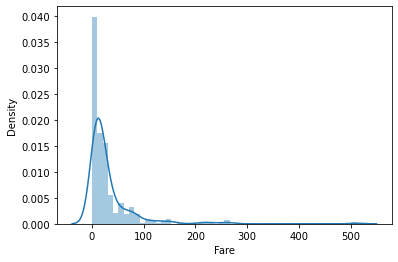

In [145]:
sns.distplot(titanic['Fare'])

In [146]:
titanic['Fare'].skew()

4.786429747056348

In [147]:
titanic['Fare_log'] = np.log(titanic['Fare']+1)

In [148]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Fare_log
0,0,3,1,22,1,0,7,2.079442
1,1,1,0,38,1,0,71,4.276666
2,1,3,0,26,0,0,7,2.079442
3,1,1,0,35,1,0,53,3.988984
4,0,3,1,35,0,0,8,2.197225


In [149]:
titanic['Fare_log'].skew()

0.41041466658391057

<IPython.core.display.Javascript object>

C:\Users\Administrator\AppData\Roaming\Python\Python38\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare_log', ylabel='Density'>

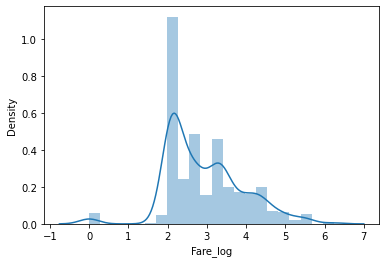

In [150]:
sns.distplot(titanic['Fare_log'])

In [151]:
titanic[titanic['Fare']==0]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Fare_log
179,0,3,1,36,0,0,0,0.0
263,0,1,1,40,0,0,0,0.0
271,1,3,1,25,0,0,0,0.0
277,0,2,1,29,0,0,0,0.0
302,0,3,1,19,0,0,0,0.0
413,0,2,1,29,0,0,0,0.0
466,0,2,1,29,0,0,0,0.0
481,0,2,1,29,0,0,0,0.0
597,0,3,1,49,0,0,0,0.0
633,0,1,1,29,0,0,0,0.0


In [152]:
x = titanic.drop('Fare',axis=1)

In [153]:
x

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare_log
0,0,3,1,22,1,0,2.079442
1,1,1,0,38,1,0,4.276666
2,1,3,0,26,0,0,2.079442
3,1,1,0,35,1,0,3.988984
4,0,3,1,35,0,0,2.197225
...,...,...,...,...,...,...,...
886,0,2,1,27,0,0,2.639057
887,1,1,0,19,0,0,3.433987
888,0,3,0,29,1,2,3.178054
889,1,1,1,26,0,0,3.433987


In [154]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.30, random_state= 35)

In [155]:
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [156]:
clf.score(x_train,y_train)

1.0

In [157]:
clf.score(x_test,y_test)

1.0

In [158]:
scalar = StandardScaler()

In [159]:
x_transform = scalar.fit_transform(X)
grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,32,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'splitter' : ['best', 'random']
    
}

In [160]:
grid_search = GridSearchCV(estimator=clf,
                     param_grid=grid_param,
                     cv=5,
                    n_jobs =-1)

In [161]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                     

In [162]:
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 2,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'splitter': 'best'}

In [163]:
grid_search.best_score_

1.0

In [164]:
clf = DecisionTreeClassifier(criterion = 'gini', max_depth = 2, min_samples_leaf = 1, min_samples_split = 2, splitter = 'best')

In [165]:
clf.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [166]:
clf.score(x_test,y_test)

1.0

In [167]:
y_pred = clf.predict(x_test)
accuracy_score(y_test,y_pred)

1.0

In [168]:
confusion_matrix (y_test,y_pred)

array([[161,   0],
       [  0, 107]], dtype=int64)

In [105]:
x

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare_sqrt
0,0,3,1,22,1,0,2.645751
1,1,1,0,38,1,0,8.426150
2,1,3,0,26,0,0,2.645751
3,1,1,0,35,1,0,7.280110
4,0,3,1,35,0,0,2.828427
...,...,...,...,...,...,...,...
886,0,2,1,27,0,0,3.605551
887,1,1,0,19,0,0,5.477226
888,0,3,0,29,1,2,4.795832
889,1,1,1,26,0,0,5.477226


In [106]:
titanic['Fare_sqrt'] = np.sqrt(titanic['Fare'])

In [107]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Fare_sqrt
0,0,3,1,22,1,0,7,2.645751
1,1,1,0,38,1,0,71,8.426150
2,1,3,0,26,0,0,7,2.645751
3,1,1,0,35,1,0,53,7.280110
4,0,3,1,35,0,0,8,2.828427


In [108]:
titanic['Fare_sqrt'].skew()

2.0656452233235334

<IPython.core.display.Javascript object>

C:\Users\Administrator\AppData\Roaming\Python\Python38\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare_sqrt', ylabel='Density'>

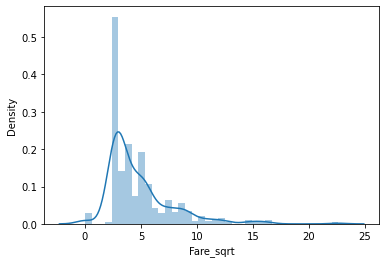

In [109]:
sns.distplot(titanic['Fare_sqrt'])

In [110]:
x = titanic.drop('Fare',axis=1)

In [111]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.30, random_state= 35)

In [112]:
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)
clf.score(x_train,y_train)

1.0

In [113]:
clf.score(x_test,y_test)

1.0

In [114]:
y_pred = clf.predict(x_test)

In [116]:
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(y_test,y_pred)

1.0

In [118]:
confusion_matrix (y_test,y_pred)

array([[161,   0],
       [  0, 107]], dtype=int64)